# Data Exploration / Exploratory Data Analysis

... a.k.a. where do you start when you have a brand new data set?

Let's look at California housing data...

In [15]:
import sklearn.datasets

data = sklearn.datasets.fetch_california_housing() # data_home=None, download_if_missing=True, return_X_y=False)

In [16]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------

In [17]:
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

# Let's put it into a dataframe for ease of analysis

In [18]:
import pandas as pd
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='HouseValue')
df = pd.concat([X, y], axis=1)

In [19]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  HouseValue  
0    -122.23       4.526  
1    -122.22       3.585  
2    -122.24       3.521  
3    -122.25       3.413  
4    -122.25       3.422

# Scatterplots are nice to visualize correlations between inputs & outputs

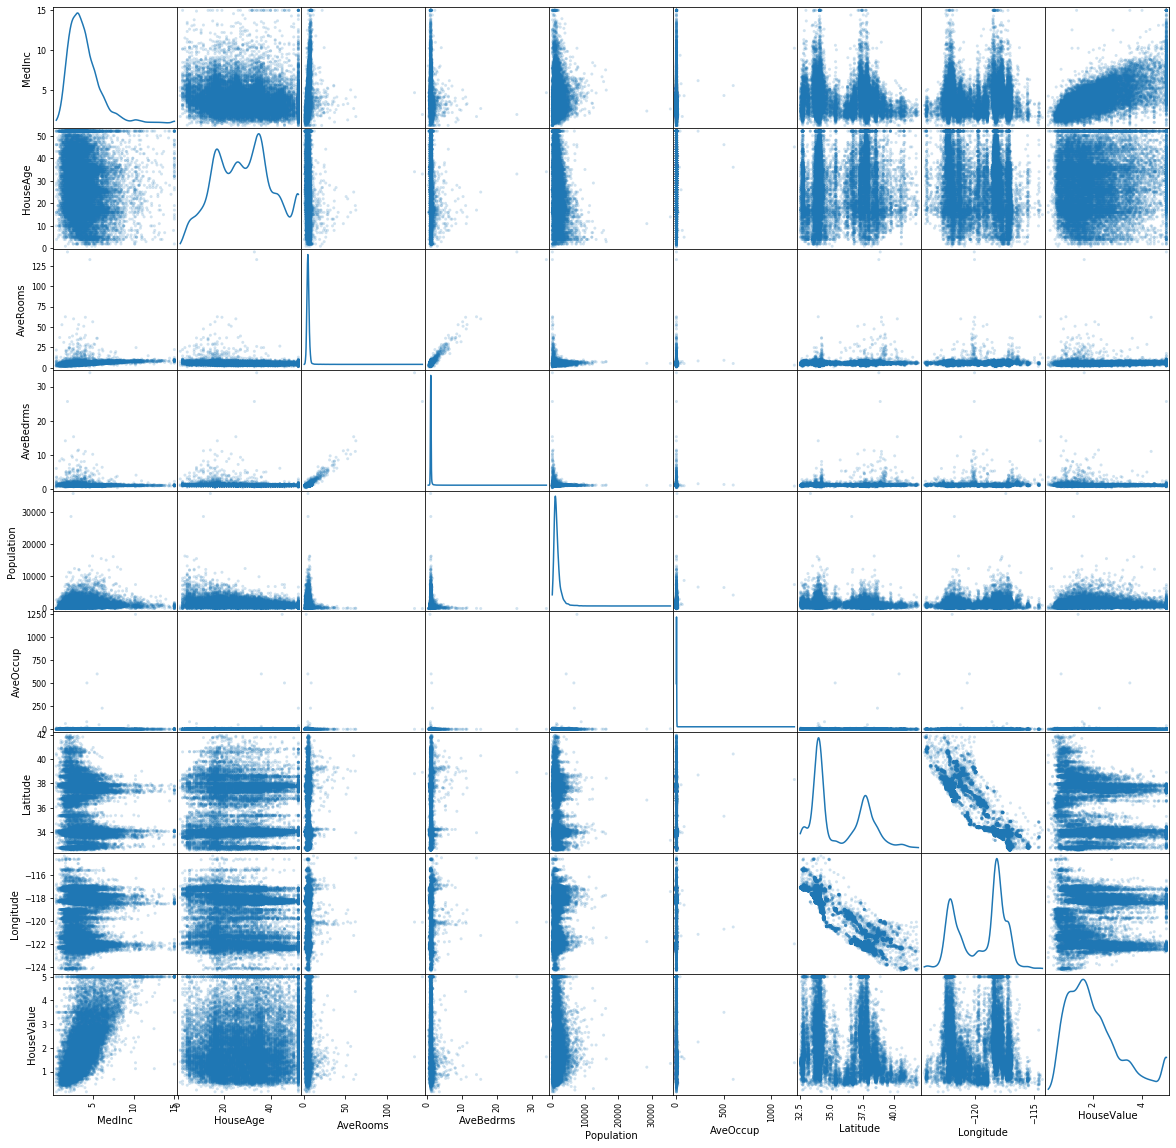

In [23]:
%matplotlib inline
pd.plotting.scatter_matrix(df, figsize=(20, 20), diagonal='kde', alpha=0.2);

# We can also look at a correlation values as raw numbers...

In [26]:
df_corr = df.corr()
df_corr

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
HouseValue  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude  HouseValue  
MedInc     -0.079809  -0.015176    0.688075  
HouseAge    0.011173  -0.108197    0.105623  
AveRooms    0.106389  -0.027540    0.151948  
AveBedrms   0.069721   0.013344   -0.046701  
Population -0.108785   0.099773   -0.024650  
AveOccup    0.002366   0.002476   -0.023737  
Latitude    1.000000  -0.924664   -0.144160  
Longitude  -0.924664   1.000000   -0.045967  
HouseValue -0.144160  -0.045967    1.000000

# How are the input values correlated with the output?

In [28]:
df_corr['HouseValue'].sort_values()

Latitude     -0.144160
AveBedrms    -0.046701
Longitude    -0.045967
Population   -0.024650
AveOccup     -0.023737
HouseAge      0.105623
AveRooms      0.151948
MedInc        0.688075
HouseValue    1.000000
Name: HouseValue, dtype: float64

# Sometimes a heatmap of correlation can call out things:

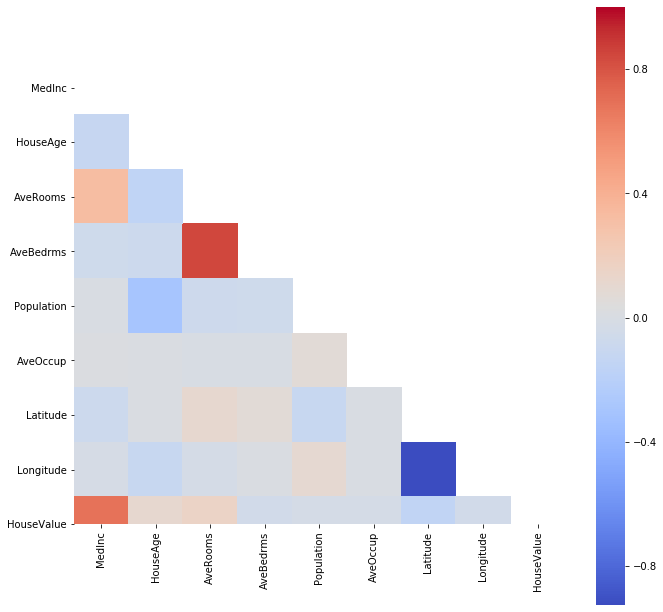

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(11, 11))

mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

sns.heatmap(df_corr, mask=mask, square=True, cmap='coolwarm')

Some correlations don't matter at all...

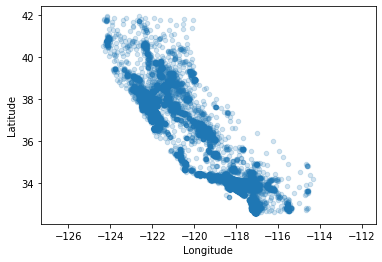

In [53]:
df.plot.scatter('Longitude', 'Latitude', alpha=0.2)
plt.axis('equal');

# Knowing the shape of your data (rows x columns) is important as well

In [46]:
df.shape

(20640, 9)

... and knowing the summary statistics

In [47]:
df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude    HouseValue  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

# What percentage of median income do Californians spend on their house?

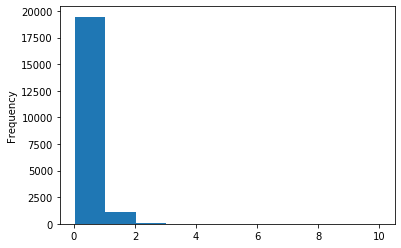

In [50]:
house_to_income = (df.HouseValue / df.MedInc)
house_to_income.plot.hist()

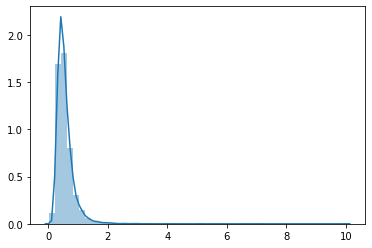

In [51]:
sns.distplot(house_to_income)

# Does this ratio vary with income?

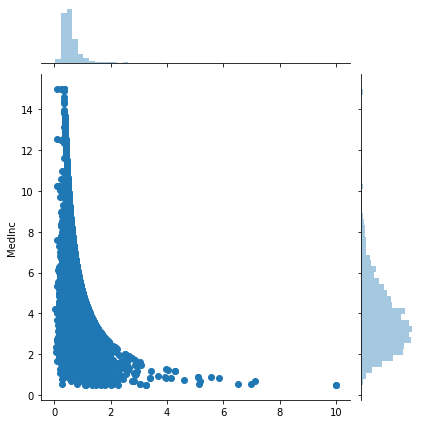

In [52]:
sns.jointplot(house_to_income, df.MedInc)